# RL Assignment 1

In [1]:
# Install the required packages
!pip install gymnasium matplotlib numpy

## Part 1: Defining RL Environments

In [2]:
# Import required libraries
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum

### 1.1: Deterministic Environment

In [3]:
# Action ENUM
class Action(Enum):
    DOWN = 0
    UP = 1
    RIGHT = 2
    LEFT = 3

In [4]:
"""
Definition of the Grid Env class.

References: RL Env Creation and Random Agent Demo
"""
class DeterministicGridEnv(gym.Env):
    # Attribute of a Gym class that provides info about the render modes
    metadata = { 'render.modes': [] }

    # Initialization function
    def __init__(self, rows, cols, max_timesteps, agent_pos, goal_pos, rewards_map):

      self.observation_space = spaces.Discrete(rows*cols)
      self.action_space = spaces.Discrete(4)
      self.max_timesteps = max_timesteps

      self.timestep = 0
      self.rows = rows
      self.cols = cols
      self.agent_pos = agent_pos
      self.goal_pos = goal_pos

      self.rewards_map = rewards_map

      self.reset()

    # Reset function
    def reset(self):
      self.state = np.zeros((self.rows, self.cols))
      self.state[tuple(self.agent_pos)] = 1
      self.state[tuple(self.goal_pos)] = 0.5
      observation = self.state.flatten()

      info = {}

      return observation, info

    # Step function: Contains the implementation for what happens when an
    # agent takes a step in the environment.
    def step(self, action):

      if action == Action.DOWN.value:
        self.agent_pos[0] += 1
      elif action == Action.UP.value:
        self.agent_pos[0] -= 1
      elif action == Action.RIGHT.value:
        self.agent_pos[1] += 1
      elif action == Action.LEFT.value:
        self.agent_pos[1] -= 1

      # Comment this to demonstrate the truncation condition.
      self.agent_pos = np.clip(self.agent_pos, 0, 2)

      observation, info = self.reset()

      reward = 0
      # check rewards map for reward
      if tuple(self.agent_pos) in self.rewards_map:
        reward = self.rewards_map[tuple(self.agent_pos)]

      self.timestep += 1

      # Condition to check for termination (episode is over)
      terminated = True if self.timestep >= self.max_timesteps else False

      # Condition to check if agent is traversing to a cell beyond the permitted cells
      # This helps the agent to learn how to behave in a safe and predictable manner
      truncated = True if np.all((np.asarray(self.agent_pos) >=0 ) & (np.asarray(self.agent_pos) <= 2)) else False

      return observation, reward, terminated, truncated, info

    # Render function: Visualizes the environment
    def render(self):
      plt.title('Grid Environment')
      plt.imshow(self.state)

In [5]:
"""
Definition an agent that takes action randomly

References: RL Env Creation and Random Agent Demo
"""
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    """Takes a step in the environment by choosing an action randomly.

    Args:
        obs: The current observation.

    Returns:
        The action to take.
    """
    return np.random.choice(self.action_space.n)

In [6]:
# Define 4 rewards for the agent to collect
rewards_map = {
    (0, 1): 1,
    (1, 1): 3,
    (2, 1): -2,
    (2, 3): 10
}

# Initialize the environment
env = DeterministicGridEnv(3, 4, 10, [0, 0], [2, 3], rewards_map)

# Initialize the agent
agent = RandomAgent(env)

Timestep: 1 , State: [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5] , Action: LEFT , Reward: 0
Timestep: 2 , State: [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5] , Action: UP , Reward: 0
Timestep: 3 , State: [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5] , Action: UP , Reward: 0
Timestep: 4 , State: [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5] , Action: LEFT , Reward: 0
Timestep: 5 , State: [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.5] , Action: DOWN , Reward: 0
Timestep: 6 , State: [0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.5] , Action: DOWN , Reward: 0
Timestep: 7 , State: [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.5] , Action: UP , Reward: 0
Timestep: 8 , State: [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.5] , Action: LEFT , Reward: 0
Timestep: 9 , State: [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5] , Action: UP , Reward: 0
Timestep: 10 , State: [1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5] , Action: UP , Reward: 0


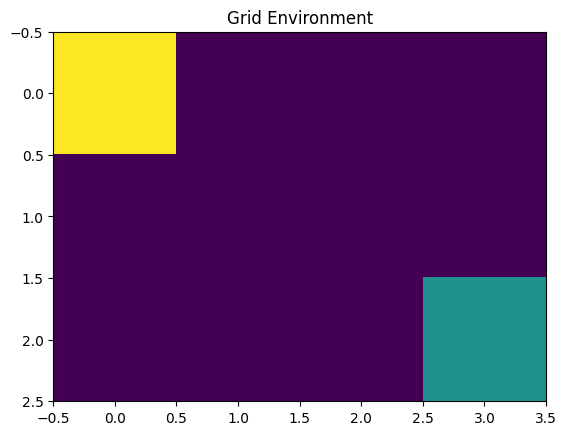

In [7]:
obs, info = env.reset()
terminated, truncated = False, False

for _ in range(10):
    action = agent.step(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    print('Timestep:', env.timestep, ', State:', obs, ', Action:', Action(action).name, ', Reward:', reward)
    env.render()

### Part 1.2: Stochastic Environment

In [8]:
"""
Definition of the Stochastic Grid Env class.
Extend the DeterministicGridEnv class to include stochasticity in the environment.
"""
class StochasticGridEnv(DeterministicGridEnv):
  def __init__(self, rows, cols, max_timesteps, agent_pos, goal_pos, rewards_map, p_stochastic):
    super().__init__(rows, cols, max_timesteps, agent_pos, goal_pos, rewards_map)
    self.p_stochastic = p_stochastic

  def step(self, action):
    if np.random.rand() < self.p_stochastic:
      action = np.random.choice(self.action_space.n)

    return super().step(action)

In [9]:
# Define 4 rewards for the agent to collect
rewards_map = {
    (0, 1): 1,
    (1, 1): 3,
    (2, 1): -2,
    (2, 3): 10
}

# Initialize the environment
env = StochasticGridEnv(3, 4, 10, [0, 0], [2, 3], rewards_map, 0.5)

# Initialize the agent
agent = RandomAgent(env)

Timestep: 1 , State: [0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5] , Action: DOWN , Reward: 1
Timestep: 2 , State: [0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.5] , Action: LEFT , Reward: 0
Timestep: 3 , State: [0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.5] , Action: UP , Reward: 0
Timestep: 4 , State: [0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.5] , Action: RIGHT , Reward: 0
Timestep: 5 , State: [0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.5] , Action: DOWN , Reward: 0
Timestep: 6 , State: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.5] , Action: DOWN , Reward: 0
Timestep: 7 , State: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.5] , Action: LEFT , Reward: 0
Timestep: 8 , State: [0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.5] , Action: DOWN , Reward: -2
Timestep: 9 , State: [0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.5] , Action: DOWN , Reward: -2
Timestep: 10 , State: [0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.5] , Action: UP , Reward: 3


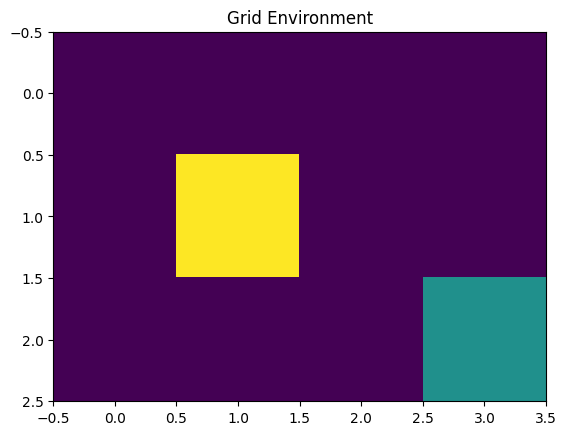

In [10]:
obs, info = env.reset()
terminated, truncated = False, False

for _ in range(10):
    action = agent.step(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    print('Timestep:', env.timestep, ', State:', obs, ', Action:', Action(action).name, ', Reward:', reward)
    env.render()